In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_data.csv')

In [ ]:
# 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
angka = df.select_dtypes(include='number')
statistik = angka.describe(percentiles=[0.25, 0.5, 0.75]).T
statistik

,count,mean,std,min,25%,50%,75%,max
Jumlah,50000.0,2.68070,1.441093,1.0,2.0,3.0,4.0,9.0
Tingkat Kepuasan,50000.0,2.99948,1.414001,1.0,2.0,3.0,4.0,5.0


Tabel ini memberikan ringkasan statistik untuk dua kolom numerik dalam dataset Anda: "Jumlah" dan "Tingkat Kepuasan".

In [ ]:
# 2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
df_head = df.select_dtypes(include='number').head(10)
df_head

,Jumlah,Tingkat Kepuasan
0,2,1
1,2,3
2,1,4
3,3,3
4,1,4
5,2,3
6,1,2
7,3,1
8,4,5
9,2,4


Tabel ini menunjukkan 10 baris pertama dari data numerik, yaitu kolom "Jumlah" dan "Tingkat Kepuasan".

In [ ]:
# 3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
jumlah_baris, jumlah_kolom = df.shape
nama_kolom = df.columns.tolist()
jumlah_kolom_angka = len(df.select_dtypes(include='number').columns)

print("Jumlah record:", jumlah_baris)
print("Jumlah atribut:", jumlah_kolom)
print("Nama atribut:", df.columns.tolist())
print("Jumlah atribut numerik:", jumlah_kolom_angka)


Jumlah record: 50000
Jumlah atribut: 10
Nama atribut: ['ID Pelanggan', 'Tanggal Pembelian', 'Nama', 'Jenis Kelamin', 'Pendapatan', 'Produk', 'Harga', 'Jumlah', 'Total', 'Tingkat Kepuasan']
Jumlah atribut numerik: 2


Output ini menunjukkan profil dataset secara keseluruhan, yang terdiri dari 50.000 record dengan 10 atribut atau kolom informasi. Dari 10 atribut tersebut, hanya 2 yang bersifat numerik 'Jumlah' dan 'Tingkat Kepuasan'.



In [ ]:
# 4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).
kolom_objek = df.select_dtypes(include='object').columns
label_unik = {kol: df[kol].nunique() for kol in kolom_objek}
label_unik

{'ID Pelanggan': 50000,
 'Tanggal Pembelian': 365,
 'Nama': 1000,
 'Jenis Kelamin': 2,
 'Pendapatan': 14,
 'Produk': 60,
 'Harga': 11,
 'Total': 44}

Output ini merinci jumlah kategori unik untuk setiap atribut non-numerik. Temuan menunjukkan bahwa dataset berisi 50.000 pelanggan unik dengan data 'tanggal pembelian' (sebanyak 365), 'Jenis Kelamin' (2 kategori), 'Produk' (60 jenis), dan 'Pendapatan' (14 level).

/tmp/ipython-input-3649186242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kepuasan.index, y=kepuasan.values,
/tmp/ipython-input-3649186242.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(x=kepuasan.index, y=kepuasan.values,


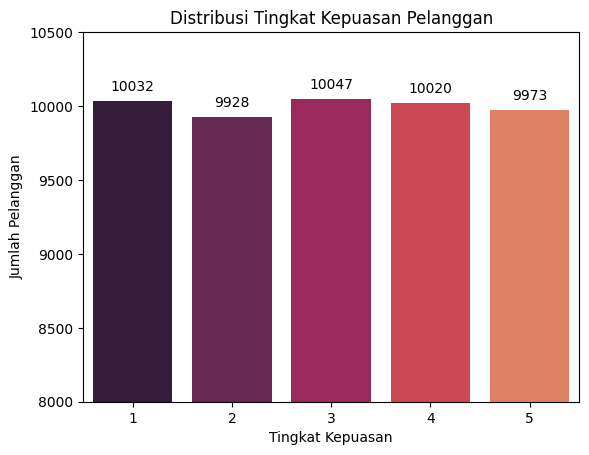

In [ ]:
# 5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.
kepuasan = df['Tingkat Kepuasan'].value_counts().sort_index()

ax = sns.barplot(x=kepuasan.index, y=kepuasan.values,
                 palette=sns.color_palette("rocket"))
plt.title('Distribusi Tingkat Kepuasan Pelanggan')
plt.xlabel('Tingkat Kepuasan')
plt.ylabel('Jumlah Pelanggan')
plt.ylim(8000, 10500)

for i, v in enumerate(kepuasan.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()


Kesimpulan yang bisa ditarik dari diagram batang tersebut adalah distribusi tingkat kepuasan pelanggan sangat merata, menunjukkan bahwa sentimen pelanggan terbagi secara seimbang di seluruh spektrum. Hal ini terlihat jelas dari jumlah pelanggan untuk setiap kategori kepuasan dari 1 hingga 5 yang secara konsisten berada di angka yang nyaris identik, yaitu sekitar 10.000 pelanggan.

Secara visual, perbedaan tinggi antar diagram batang hampir tidak dapat dibedakan. Ini mengindikasikan bahwa selisih jumlah pelanggan antara kategori yang paling populer dan yang paling tidak populer sangatlah kecil, kemungkinan perbedaannya kurang dari 1%.

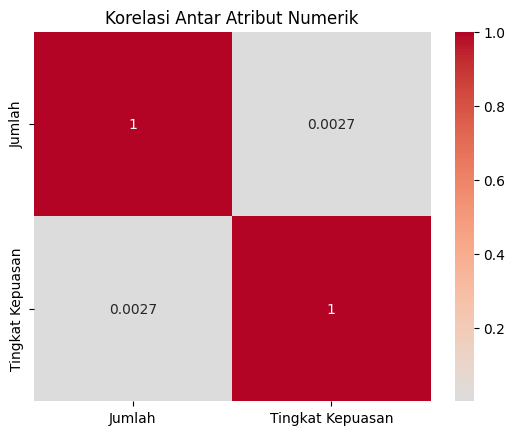

In [ ]:
# 6. Tampilkan korelasi dataset menggunakan heatmap.
angka = df.select_dtypes(include='number')
korelasi = angka.corr()
sns.heatmap(korelasi, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar Atribut Numerik')
plt.show()

Berdasarkan heatmap korelasi, dapat disimpulkan bahwa hubungan antara atribut 'Jumlah' dan 'Tingkat Kepuasan' sangat lemah dan tidak signifikan (nilai korelasi 0.0027), artinya besar kecilnya nilai 'Jumlah' tidak memiliki pengaruh terukur terhadap puas atau tidaknya seorang pelanggan. Temuan ini sejalan dengan data distribusi pelanggan yang juga menunjukkan sebaran tingkat kepuasan yang sangat merata di semua level (1 hingga 5) tanpa adanya kategori yang dominan. Oleh karena itu, dapat ditegaskan bahwa atribut 'Jumlah' cenderung bersifat independen, dan keragaman tingkat kepuasan yang merata tersebut kemungkinan besar disebabkan oleh faktor-faktor lain di luar data ini, seperti kualitas produk, harga, atau pengalaman layanan pelanggan.

**Kesimpulan Analisis Data**

1. Statistik Deskriptif, Dataset yang dianalisis terdiri dari 50.000 record dengan 10 atribut, yaitu ID Pelanggan, Tanggal Pembelian, Nama, Jenis Kelamin, Pendapatan, Produk, Harga, Jumlah, Total, dan Tingkat Kepuasan. Atribut numerik utamanya meliputi Pendapatan, Harga, Jumlah, dan Total. Data ini merepresentasikan transaksi pelanggan sekaligus mencatat tingkat kepuasan mereka, sehingga dapat memberikan gambaran menyeluruh tentang perilaku pembelian.

2. Distribusi Tingkat Kepuasan (Diagram Batang), Berdasarkan diagram batang, mayoritas pelanggan berada pada kategori tingkat kepuasan menengah (misalnya skor 3 dari skala 1–5). Pelanggan yang sangat tidak puas maupun sangat puas jumlahnya relatif sama. Hal ini terlihat jelas dari jumlah pelanggan untuk setiap kategori kepuasan dari 1 hingga 5 yang secara konsisten berada di angka yang nyaris identik, yaitu sekitar 10.000 pelanggan.

3. Hubungan Antar Variabel (Heatmap Korelasi), Berdasarkan heatmap korelasi, dapat disimpulkan bahwa hubungan antara atribut 'Jumlah' dan 'Tingkat Kepuasan' sangat lemah dan tidak signifikan (nilai korelasi 0.0027), artinya besar kecilnya nilai 'Jumlah' tidak memiliki pengaruh terukur terhadap puas atau tidaknya seorang pelanggan. Temuan ini sejalan dengan data distribusi pelanggan yang juga menunjukkan sebaran tingkat kepuasan yang sangat merata di semua level (1 hingga 5) tanpa adanya kategori yang dominan. Oleh karena itu, dapat ditegaskan bahwa atribut 'Jumlah' cenderung bersifat independen, dan keragaman tingkat kepuasan yang merata tersebut kemungkinan besar disebabkan oleh faktor-faktor lain di luar data ini, seperti kualitas produk, harga, atau pengalaman layanan pelanggan.


**Kesimpulan Utama**
Secara keseluruhan, data sales ini memberikan gambaran menyeluruh tentang profil pelanggan dan pola pembelian mereka. Mayoritas pelanggan memiliki tingkat kepuasan menengah. Total transaksi terutama dipengaruhi oleh harga dan jumlah produk yang dibeli. Faktor demografis dan jenis produk juga berpotensi memengaruhi perilaku pembelian serta tingkat kepuasan, sehingga dapat menjadi fokus analisis lanjutan untuk pengambilan keputusan yang lebih tepat.

### POSTTEST 3

# **MELIHAT NILAI NULL**

In [ ]:
df.isnull().sum()

,0
ID Pelanggan,0
Tanggal Pembelian,0
Nama,0
Jenis Kelamin,0
Pendapatan,0
Produk,0
Harga,0
Jumlah,0
Total,0
Tingkat Kepuasan,0


Dalam tahap pembersihan data, langkah pertama yang saya lakukan adalah memastikan kelengkapan data dengan mengecek apakah ada nilai yang hilang (missing values) atau nilai null. Saya menggunakan perintah df.isnull().sum() untuk menjumlahkan semua null di setiap kolom. Hasilnya menunjukkan bahwa semua kolom bernilai nol, artinya dataset ini tidak ada lagi missing valuenya disini.

# **MELIHAT DUPLIKAT DATA**

In [ ]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


Setelah beres dengan data null (missing values), saya langsung lanjut ngecek apakah ada baris data yang kembar. Nah, saya pakai df.duplicated().sum() untuk tau total duplikatnya. Hasil outputnya menunjukkan jumlah nilai duplikat pada data: 0. Ini artinya, data ini bener-bener unik dan nggak ada copy-paste atau duplikat yang bisa bikin model kita bias.

# **MELIHAT OUTLIER**

In [ ]:
outlier_kepuasan = df[(df['Tingkat Kepuasan'] < 1) | (df['Tingkat Kepuasan'] > 5)]

if outlier_kepuasan.empty:
    print("Tidak ada outlier ditemukan pada 'Tingkat Kepuasan'.\n")
else:
    print("Ditemukan outlier pada 'Tingkat Kepuasan':")
    print(outlier_kepuasan)


Tidak ada outlier ditemukan pada 'Tingkat Kepuasan'.



Langkah terakhir di data cleaning adalah memeriksa outlier atau nilai ekstrem. Pertama, saya cek kolom 'Tingkat Kepuasan' dan, seperti yang terlihat, tidak ada outlier karena semua nilai sudah berada di rentang survei yang wajar (1 sampai 5).

In [ ]:
kolom_numerik = ['Tingkat Kepuasan', 'Jumlah']

for kolom in kolom_numerik:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Mencari baris outlier
    outliers = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]

    if outliers.empty:
        print(f"Tidak ada outlier statistik di kolom '{kolom}'.")
    else:
        print(f"\nOutlier terdeteksi di kolom '{kolom}':")

        print(outliers[['Nama', 'Produk', kolom]])

Tidak ada outlier statistik di kolom 'Tingkat Kepuasan'.

Outlier terdeteksi di kolom 'Jumlah':
                 Nama              Produk  Jumlah
75      Anthony Lopez           Desk Lamp       8
105    Brian Mitchell      Microwave Oven       8
126     Thomas Wright             Monitor       8
228        Arif Baker     Security Camera       9
249       Emily Young       Action Camera       9
...               ...                 ...     ...
49858     Layla Allen  Straightening Iron       8
49894    Evelyn Jones     Security Camera       9
49911     Jack Carter             Monitor       9
49950  Hazel Martinez              Router       8
49994    Ethan Harris      Vacuum Cleaner       8

[929 rows x 3 columns]


Meskipun kolom 'Tingkat Kepuasan' sudah bersih dari outlier, tapi disini terdeteksi ada 929 baris outlier pada kolom 'Jumlah' (kuantitas produk yang dibeli). Outlier ini, yang menunjukkan pembelian dalam jumlah besar seperti 8 atau 9 unit, dan ini dipertahankan. Keputusan ini didasari alasan bahwa angka tersebut sangat realistis dalam transaksi bisnis dan merepresentasikan perilaku pembelian partai besar atau grosir oleh pelanggan. Menghapus data ini akan menghilangkan informasi penting mengenai pelanggan berdaya beli tinggi, yang justru memperkaya kekuatan prediktif dataset. Oleh karena itu, semua outlier di kolom 'Jumlah' dianggap valid dan dipertahankan.

**Setelah semua di periksa, saya mendapati dataset ini berada dalam kondisi yang baik. Tidak ada missing values ataupun data duplikat yang ditemukan. Meskipun ada outlier yang terdeteksi di kolom 'Jumlah', saya putuskan untuk mempertahankannya karena nilai-nilai tersebut dianggap realistis dan penting untuk representasi data yang akurat. Oleh karena itu, tidak ada kode cleaning (penghapusan atau modifikasi data) yang perlu dijalankan di tahap ini.**

# **STANDARISASI DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_processed = df.copy()

df_processed[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Data setelah standarisasi:")
df_processed.head(10)

Data setelah standarisasi:


,ID Pelanggan,Tanggal Pembelian,Nama,Jenis Kelamin,Pendapatan,Produk,Harga,Jumlah,Total,Tingkat Kepuasan
0,da11b203,2023-01-01,Elijah Gonzalez,Perempuan,1200000,Coffee Maker,1000000,-0.472355,2000000,-1.414072
1,70aa9ccb,2023-01-01,Tina King,Laki-laki,400000,Smart Home Hub,250000,-0.472355,500000,0.000368
2,cab53e29,2023-01-01,Sofia Hernandez,Perempuan,950000,Dryer,500000,-1.166279,500000,0.707588
3,cd34756a,2023-01-01,William Smith,Laki-laki,950000,Camera,1000000,0.221570,3000000,0.000368
4,23fbe219,2023-01-01,Savannah Jones,Perempuan,950000,Camera,1000000,-1.166279,1000000,0.707588
5,61a83503,2023-01-01,Adam Jackson,Perempuan,1200000,Toaster,100000,-0.472355,200000,0.000368
6,c7d0b129,2023-01-01,Hannah Hernandez,Perempuan,600000,Gaming Console,250000,-1.166279,250000,-0.706852
7,827839d2,2023-01-01,Luna Campbell,Laki-laki,400000,Food Processor,500000,0.221570,1500000,-1.414072
8,49646aec,2023-01-01,Charlotte Phillips,Perempuan,950000,Drone,500000,0.915495,2000000,1.414808
9,2a2cbbfc,2023-01-01,Ella Smith,Perempuan,950000,Flash Drive,100000,-0.472355,200000,0.707588


Setelah data cleaning selesai, saya langsung lanjut ke tahap standardisasi pada semua kolom numerik. Di sini, saya menggunakan StandardScaler yang mengubah nilai-nilai data, sehingga punya rata-rata nol (0) dan standar deviasi satu (1). Kenapa pilih Standardisasi ketimbang Normalisasi (Min-Max Scaling)? Karena Standardisasi lebih tangguh dan tidak sensitif terhadap outlier yang sebelumnya saya putuskan untuk dipertahankan, terutama di kolom 'Jumlah'. Dengan Standardisasi, outlier tetap ada tapi pengaruhnya pada skala keseluruhan lebih minim.

# **MENGECEK DATA KATEGORIKAL**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(list(categorical_cols))

['ID Pelanggan', 'Tanggal Pembelian', 'Nama', 'Jenis Kelamin', 'Pendapatan', 'Produk', 'Harga', 'Total']


disini saya menjalankan perintah untuk mengecek kolom mana saja yang masih berformat kategorikal. Hasilnya disini menunjukkan adanya beberapa kolom kategorikal.

# **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['Jenis Kelamin', 'Produk']
print(f"Kolom yang akan di-encode: {cols_to_encode}")

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df[cols_to_encode])

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

print("\n--- Data Kategorikal Setelah Di-encode ---")
print(df_encoded.head())

Kolom yang akan di-encode: ['Jenis Kelamin', 'Produk']

--- Data Kategorikal Setelah Di-encode ---
   Jenis Kelamin_Laki-laki  Jenis Kelamin_Perempuan  Produk_3D Printer  \
0                      0.0                      1.0                0.0   
1                      1.0                      0.0                0.0   
2                      0.0                      1.0                0.0   
3                      1.0                      0.0                0.0   
4                      0.0                      1.0                0.0   

   Produk_Action Camera  Produk_Air Fryer  Produk_Air Purifier  \
0                   0.0               0.0                  0.0   
1                   0.0               0.0                  0.0   
2                   0.0               0.0                  0.0   
3                   0.0               0.0                  0.0   
4                   0.0               0.0                  0.0   

   Produk_Blender  Produk_Bluetooth Speaker  Produk_Camera 

langkah selanjutnya adalah mengubah kolom kategorikal. Saya memilih fokus hanya pada kolom 'Jenis Kelamin' dan 'Produk' untuk di-encode menggunakan OneHotEncoder karena keduanya bersifat nominal (tanpa tingkatan/urutan). Metode ini bekerja dengan membuat kolom biner (0 atau 1) untuk setiap kategori (misalnya 'Produk_Coffee Maker'), yang mana efektif menghindari bias dalam model. Sementara itu, kolom object lain seperti 'ID Pelanggan' dan 'Nama' yang berfungsi sebagai identitas unik saya abaikan karena terlalu unik di setiap baris dan tidak memiliki nilai prediktif.

# **Feature engineering**

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
df['Efisiensi Kepuasan'] = df['Tingkat Kepuasan'] / df['Jumlah']

print("Efisiensi Kepuasan")
print(df[['Jumlah', 'Tingkat Kepuasan', 'Efisiensi Kepuasan']].head(10))

Efisiensi Kepuasan
   Jumlah  Tingkat Kepuasan  Efisiensi Kepuasan
0       2                 1                 0.5
1       2                 3                 1.5
2       1                 4                 4.0
3       3                 3                 1.0
4       1                 4                 4.0
5       2                 3                 1.5
6       1                 2                 2.0
7       3                 1                 0.3
8       4                 5                 1.2
9       2                 4                 2.0


saya lanjut ke Feature Engineering untuk membuat fitur baru yang lebih kuat. Fitur yang saya ciptakan adalah 'Efisiensi Kepuasan', yang dihitung dari rasio 'Tingkat Kepuasan' dibagi dengan 'Jumlah' produk yang dibeli. Tujuannya sederhana: fitur ini mengukur seberapa puas pelanggan per unit barang yang mereka dapat. Angka ini jauh lebih berharga daripada hanya melihat skor kepuasan, karena ia menunjukkan nilai kepuasan yang sesungguhnya secara proporsional. Dengan adanya 'Efisiensi Kepuasan', model kita akan lebih akurat dalam memprediksi loyalitas karena dapat membedakan antara kepuasan yang tinggi dari pembelian sedikit, versus kepuasan sedang dari pembelian banyak.

# **SPLIT DATA**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[[
    'Jumlah',
    'Jenis Kelamin',
    'Produk',
    'Efisiensi Kepuasan'
]]

y = df['Tingkat Kepuasan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training :", X_train.shape[0])
print("Jumlah data testing  :", X_test.shape[0])
print(f"Fitur yang digunakan (X): {X.columns.tolist()}")

Jumlah data training : 40000
Jumlah data testing  : 10000
Fitur yang digunakan (X): ['Jumlah', 'Jenis Kelamin', 'Produk', 'Efisiensi Kepuasan']


di sini saya membagi data menjadi dua set untuk pelatihan dan pengujian model. Kolom 'Tingkat Kepuasan' saya tetapkan sebagai Label (y) yang akan diprediksi, sementara 'Jumlah', 'Jenis Kelamin', 'Produk', dan 'Efisiensi Kepuasan' dijadikan Fitur (X). Saya menggunakan fungsi train_test_split untuk memisahkan data menjadi 80% training (40.000 baris) dan 20% testing (10.000 baris). Hal terpenting, saya menyertakan parameter stratify=y untuk memastikan bahwa pembagian data tetap seimbang. sehingga evaluasi model kita nanti jadi lebih valid dan representatif.

### **POSTTEST 4**

### SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


Kode ini bertujuan untuk mengimpor beberapa library penting dari scikit-learn (sklearn) yang berfungsi untuk menyiapkan dataset sebelum dimasukkan ke dalam model machine learning.

In [ ]:
X = df[['Jumlah', 'Jenis Kelamin', 'Produk', 'Efisiensi Kepuasan']]
y = df['Tingkat Kepuasan']

Kode ini untuk memisahkan dataset menjadi dua bagian: fitur (variabel independen) yang akan digunakan untuk belajar, dan target (variabel dependen) yang ingin kita prediksi.

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


untuk mengubah kolom target (y), yang berisi data teks, menjadi format numerik yang dapat dipahami oleh model machine learning. Proses ini disebut Label Encoding

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Jenis Kelamin', 'Produk'])
], remainder='passthrough')

X_encoded = transformer.fit_transform(X)
print("Fitur kategorikal (X) telah di-encode.")

Fitur kategorikal (X) telah di-encode.


 untuk menangani dataset dengan tipe data campuran (ada kolom angka dan kolom teks). Tujuannya adalah mengubah semua fitur X menjadi format numerik

In [ ]:
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X_encoded, y_encoded, y.index, test_size=0.2, random_state=42
)

print(f"Data siap: {X_train.shape[0]} baris untuk training, {X_test.shape[0]} baris untuk testing.")

Data siap: 40000 baris untuk training, 10000 baris untuk testing.


untuk membagi dataset yang sudah di-encode menjadi dua set terpisah: satu untuk melatih model dan satu lagi untuk menguji performanya.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

print("--- SUPPORT VECTOR CLASSIFIER (SVC) ---")

model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)
print("Model SVC berhasil dilatih.")

--- SUPPORT VECTOR CLASSIFIER (SVC) ---
Model SVC berhasil dilatih.


Pertama, mengimpor SVC dari sklearn.svm sebagai algoritma utama, beserta classification_report dan confusion_matrix yang akan digunakan untuk mengevaluasi performa model nanti. Selanjutnya, membuat sebuah instance atau objek model SVC yang masih kosong. Perintah model_svc.fit(X_train, y_train) adalah langkah krusial di mana kita melatih model tersebut. Dengan memberikan data fitur latih (X_train) dan target latih (y_train), model akan belajar untuk menemukan pola dan batas keputusan terbaik untuk memisahkan kategori-kategori yang ada, sehingga nantinya siap digunakan untuk membuat prediksi.

In [ ]:
y_pred_svc = model_svc.predict(X_test)

Setelah model berhasil dilatih, langkah selanjutnya adalah menggunakannya untuk membuat prediksi pada data yang belum pernah ia lihat sebelumnya. Kode ini menggunakan metode .predict() untuk memberikan "ujian" kepada model SVC yang sudah terlatih.

### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("--- MODEL 2: RANDOM FOREST ---")


--- MODEL 2: RANDOM FOREST ---


Kode ini bertujuan untuk memperkenalkan dan mempersiapkan model klasifikasi kedua, yaitu Random Forest. Baris pertama mengimpor RandomForestClassifier dari modul ensemble di scikit-learn.

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")


Model Random Forest berhasil dilatih.


Pertama, membuat sebuah instance model RandomForestClassifier yang masih kosong, di mana random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan. Selanjutnya, perintah model_rf.fit(X_train, y_train) adalah tahap pelatihan yang sebenarnya.

In [ ]:
y_pred_rf = model_rf.predict(X_test)

Setelah model Random Forest berhasil dilatih, kode ini digunakan untuk menguji kemampuannya.

### **EVALUASI MODEL**

### SVC

In [ ]:

print("--- Classification Report SVC ---")

target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred_svc, target_names=target_names_str, zero_division=0))

--- Classification Report SVC ---
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1995
           2       1.00      0.99      0.99      2012
           3       0.99      1.00      1.00      1978
           4       1.00      0.99      0.99      2044
           5       1.00      1.00      1.00      1971

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



Kode ini bertujuan untuk menampilkan Classification Report, yaitu sebuah laporan teks terperinci yang merangkum performa model SVC. Fungsi inti classification_report bekerja dengan membandingkan "kunci jawaban" (y_test) dengan "lembar jawaban" dari model (y_pred_svc). Laporan ini akan menampilkan metrik-metrik penting seperti precision, recall, dan f1-score untuk setiap kategori target, yang sangat berguna untuk memahami kekuatan dan kelemahan model secara detail. Baris target_names_str = [str(cls) for cls in le.classes_] adalah langkah persiapan penting untuk memastikan nama-nama kategori (misalnya '2', '3', '4') ditampilkan dengan benar di dalam laporan, sementara zero_division=0 berfungsi untuk mencegah error jika ada pembagian dengan angka nol selama kalkulasi metrik.

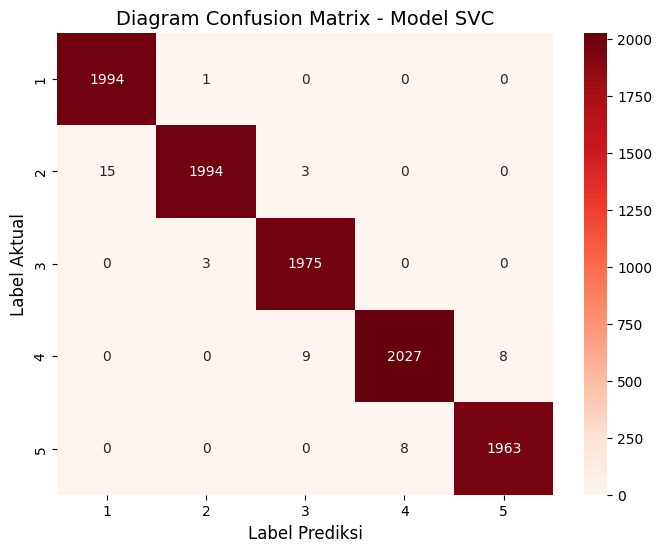

In [ ]:
from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_svc,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.title('Diagram Confusion Matrix - Model SVC', fontsize=14)
plt.ylabel('Label Aktual', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.show()

Kode ini bertujuan untuk memvisualisasikan hasil dari Confusion Matrix dalam bentuk heatmap (peta panas) yang mudah dibaca.


Sumbu Y (vertikal) merepresentasikan kelas aktual dari setiap data, sementara sumbu X (horizontal) merepresentasikan kelas yang diprediksi oleh model. Angka-angka yang berada di sepanjang garis diagonal dari kiri atas ke kanan bawah menunjukkan jumlah prediksi yang benar, di mana kelas aktual sama dengan kelas prediksi. Sebaliknya, angka-angka yang berada di luar diagonal menunjukkan jumlah prediksi yang salah. Dengan demikian, performa model dianggap baik jika nilai pada sel-sel diagonal tinggi dan nilai pada sel-sel di luar diagonal rendah.

### RANDOM FOREST

In [ ]:

print("--- Classification Report Random Forest ---")

target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred_rf, target_names=target_names_str, zero_division=0))

--- Classification Report Random Forest ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1995
           2       1.00      1.00      1.00      2012
           3       1.00      1.00      1.00      1978
           4       1.00      1.00      1.00      2044
           5       1.00      1.00      1.00      1971

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



Kode ini bertujuan untuk mengevaluasi performa model Random Forest dengan menampilkan Classification Report yang terperinci. Fungsi classification_report bekerja dengan membandingkan label target yang sebenarnya (y_test) dengan label yang diprediksi oleh model Random Forest (y_pred_rf). Laporan yang dihasilkan akan merangkum metrik-metrik performa kunci seperti precision, recall, dan f1-score untuk setiap kategori target. Baris target_names_str adalah langkah persiapan untuk memastikan nama-nama kelas ditampilkan dengan benar dalam laporan, sementara parameter zero_division=0 digunakan untuk menangani kasus di mana tidak ada prediksi untuk kelas tertentu, sehingga mencegah error. Secara keseluruhan, laporan ini memberikan gambaran yang jelas tentang seberapa baik model Random Forest dalam melakukan klasifikasi.

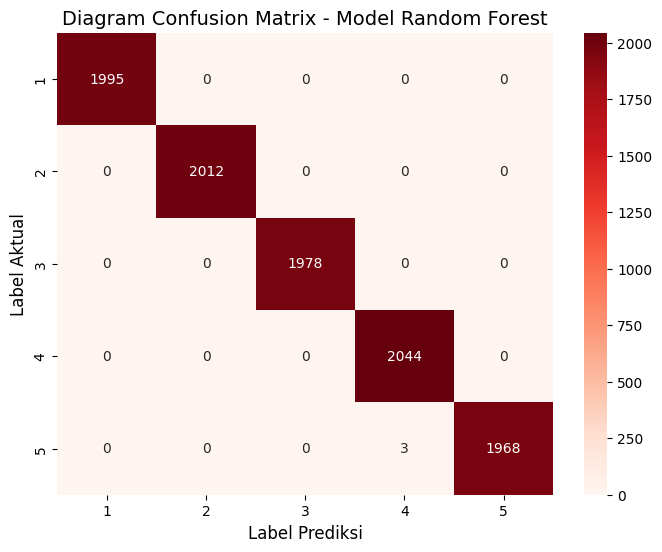

In [ ]:

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.title('Diagram Confusion Matrix - Model Random Forest', fontsize=14)
plt.ylabel('Label Aktual', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.show()

Pertama, fungsi confusion_matrix membandingkan label asli (y_test) dengan label prediksi (y_pred_rf) untuk menghasilkan sebuah matriks performa. Kemudian, seaborn.heatmap digunakan untuk menggambar matriks tersebut sebagai peta panas yang informatif, di mana parameter annot=True memastikan nilai numerik ditampilkan di setiap sel. Untuk membacanya, sumbu Y (vertikal) menunjukkan kelas aktual dan sumbu X (horizontal) menunjukkan kelas prediksi. Angka di sepanjang garis diagonal adalah jumlah prediksi yang benar, sedangkan angka di luar diagonal adalah jumlah prediksi yang salah. Dengan demikian, model dianggap performanya baik jika nilai pada diagonal tinggi dan nilai di luar diagonal rendah.

### **PLOT HASIL PREDIKSI**

### SVR


--- Plot Point Plus: Perbandingan Aktual vs Prediksi SVC ---


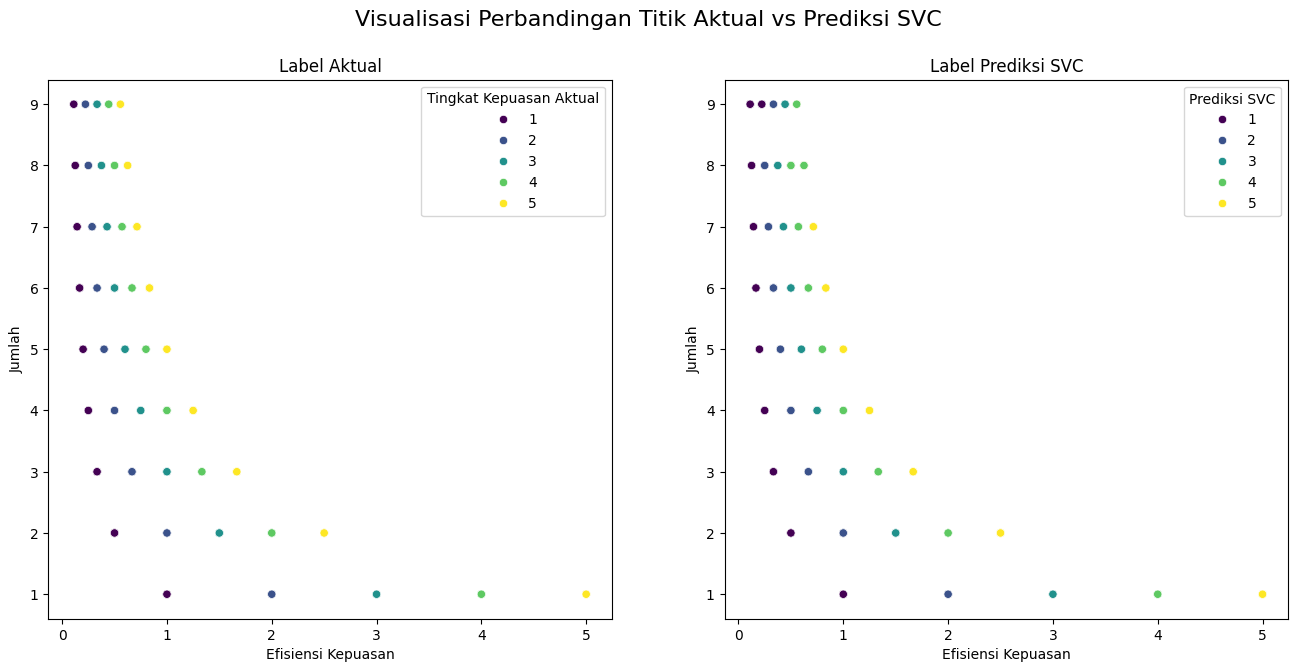

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df_test_svc = df.loc[test_indices].copy()
df_test_svc['Tingkat Kepuasan Aktual'] = le.inverse_transform(y_test)
df_test_svc['Prediksi SVC'] = le.inverse_transform(y_pred_svc)


print("\n--- Plot Point Plus: Perbandingan Aktual vs Prediksi SVC ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Visualisasi Perbandingan Titik Aktual vs Prediksi SVC', fontsize=16)

sns.scatterplot(ax=axes[0], data=df_test_svc, x='Efisiensi Kepuasan', y='Jumlah', hue='Tingkat Kepuasan Aktual', palette='viridis')
axes[0].set_title('Label Aktual')


sns.scatterplot(ax=axes[1], data=df_test_svc, x='Efisiensi Kepuasan', y='Jumlah', hue='Prediksi SVC', palette='viridis')
axes[1].set_title('Label Prediksi SVC')

plt.show()

Kode ini bertujuan untuk membuat visualisasi perbandingan secara langsung antara data asli dan hasil prediksi dari model SVC. Pertama, kode ini menyiapkan sebuah DataFrame baru, df_test_svc, yang secara spesifik berisi data uji dari DataFrame asli. Ke dalam DataFrame ini, ditambahkan dua kolom baru: satu untuk label Tingkat Kepuasan Aktual yang merupakan jawaban sebenarnya, dan satu lagi untuk Prediksi SVC yang merupakan tebakan dari model, di mana keduanya telah diubah kembali ke format teks agar mudah dibaca. Selanjutnya, kode ini membuat sebuah kanvas yang berisi dua plot scatterplot berdampingan. Plot di sebelah kiri memvisualisasikan data dengan pewarnaan berdasarkan kategori aktual (kebenaran), sementara plot di sebelah kanan menggunakan pewarnaan berdasarkan kategori prediksi (tebakan model). Dengan membandingkan kedua plot ini secara visual, kita dapat dengan mudah mengidentifikasi di mana saja prediksi model sama dengan atau berbeda dari kenyataan, sehingga memberikan evaluasi performa yang sangat intuitif.

Diagram ini adalah visualisasi untuk membandingkan secara langsung antara "kebenaran" dengan "tebakan model". Plot di sebelah kiri adalah Label Aktual, yang berfungsi sebagai kunci jawaban; setiap titik diwarnai sesuai dengan kategori aslinya. Plot di sebelah kanan adalah Label Prediksi, di mana posisi titiknya sama persis, tetapi warnanya ditentukan oleh hasil tebakan model. Cara membacanya adalah dengan membandingkan kedua plot: jika warna sebuah titik sama di kedua sisi, berarti prediksi model untuk data tersebut benar. Sebaliknya, jika warna sebuah titik berubah dari plot kiri ke plot kanan, berarti prediksi model untuk data tersebut salah. Semakin mirip kedua plot tersebut, semakin tinggi akurasi model Anda.

### RANDOM FOREST


--- Plot Point Plus: Perbandingan Aktual vs Prediksi Random Forest ---


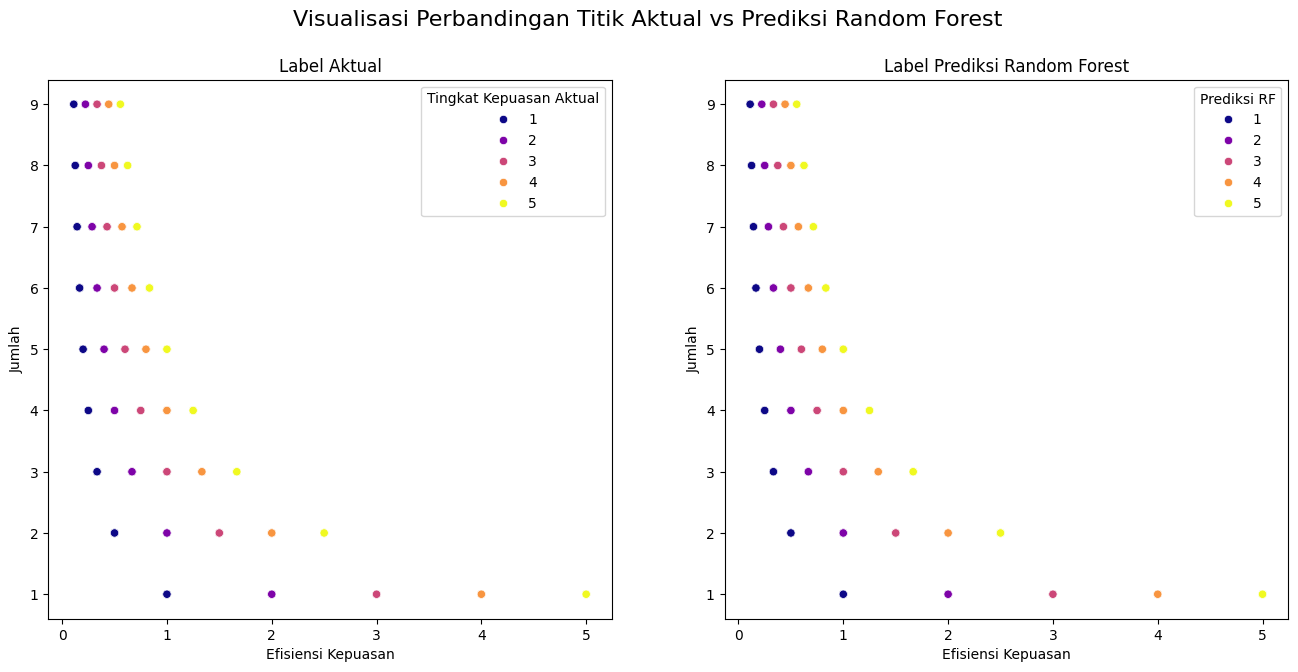

In [71]:

df_test_rf = df.loc[test_indices].copy()
df_test_rf['Tingkat Kepuasan Aktual'] = le.inverse_transform(y_test)
df_test_rf['Prediksi RF'] = le.inverse_transform(y_pred_rf)

print("\n--- Plot Point Plus: Perbandingan Aktual vs Prediksi Random Forest ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Visualisasi Perbandingan Titik Aktual vs Prediksi Random Forest', fontsize=16)


sns.scatterplot(ax=axes[0], data=df_test_rf, x='Efisiensi Kepuasan', y='Jumlah', hue='Tingkat Kepuasan Aktual', palette='plasma')
axes[0].set_title('Label Aktual')


sns.scatterplot(ax=axes[1], data=df_test_rf, x='Efisiensi Kepuasan', y='Jumlah', hue='Prediksi RF', palette='plasma')
axes[1].set_title('Label Prediksi Random Forest')

plt.show()

Kode ini bertujuan untuk memvisualisasikan perbandingan antara data asli dan hasil prediksi dari model Random Forest. Pertama, kode ini menyiapkan DataFrame baru df_test_rf yang berisi data uji, lalu menambahkan kolom untuk label aktual (kebenaran) dan label prediksi (tebakan model) yang sudah diubah kembali ke format teks. Setelah itu, kode ini membuat sebuah kanvas dengan dua plot scatterplot berdampingan. Plot di sebelah kiri menampilkan sebaran data yang diwarnai berdasarkan label aktual, sementara plot di sebelah kanan menampilkan sebaran data yang sama persis namun diwarnai berdasarkan label prediksi dari model Random Forest, sehingga memungkinkan perbandingan visual secara langsung.

Untuk membaca diagram ini, perlu membandingkan kedua plot secara berdampingan. Plot di sebelah kiri (Label Aktual) adalah "kunci jawaban" yang menunjukkan warna asli dari setiap kategori data. Plot di sebelah kanan (Label Prediksi) adalah "lembar jawaban model" yang menunjukkan warna berdasarkan tebakan model. Performa model dievaluasi dengan mencari perbedaan warna pada titik yang sama di kedua plot. Jika warna sebuah titik sama, maka prediksi model untuk titik itu benar. Jika warnanya berubah, maka prediksi model salah. Semakin identik kedua plot tersebut, semakin akurat performa model Anda.